About Dataset
Context
A Tour & Travels Company Is Offering Travel Insurance Package To Their Customers.
The New Insurance Package Also Includes Covid Cover.
The Company Requires To Know The Which Customers Would Be Interested To Buy It Based On Its Database History.
The Insurance Was Offered To Some Of The Customers In 2019 And The Given Data Has Been Extracted From The Performance/Sales Of The Package During That Period.
The Data Is Provided For Almost 2000 Of Its Previous Customers And You Are Required To Build An Intelligent Model That Can Predict If The Customer Will Be Interested To Buy The Travel Insurance Package Based On Certain Parameters Given Below.
Image Credits-Unsplash(free to use)

Content
Age- Age Of The Customer
Employment Type- The Sector In Which Customer Is Employed
GraduateOrNot- Whether The Customer Is College Graduate Or Not
AnnualIncome- The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]
FamilyMembers- Number Of Members In Customer's Family
ChronicDisease- Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
FrequentFlyer- Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].
EverTravelledAbroad- Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]
TravelInsurance- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.


In [91]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from functions import *
from IPython.display import Image
import numpy as np

In [93]:
path = "../travel-insurance-prediction/travel-insurance-dataset.csv"

travel_df = pd.read_csv(path)

travel_df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


We can see that we have "Unnamed: 0" as a column name, which provides no value. Let's drop it.


In [94]:
travel_df = travel_df.drop("Unnamed: 0", axis=1, errors="ignore")
travel_df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Now we can move into checking statistical summary of the numerical features in dataset.


In [95]:
travel_df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


### Dataset Numeric Features Overview

- **Total Records:** 1987 individuals
- **Variables:** Age, Annual Income (in Indian Rupees), Family Members, Chronic Diseases, Travel Insurance
- **Missing Values:** None in the numeric features.

### Descriptive Statistics

- **Age:** Mean = 29.65, Range = 25 to 35 years
- **Annual Income (in Indian Rupees):** Mean = ₹932,763, Range = ₹300,000 to ₹1,800,000
- **Family Members:** Mean = 4.75, Range = 2 to 9
- **Chronic Diseases:** 27.78% have chronic diseases
- **Travel Insurance:** 35.73% have travel insurance

### Key Observations

- **Income Variability:** Income varies widely, indicating potential impacts on travel insurance decisions.
- **Demographic Focus:** A focused age range (25-35) suggests a specific demographic possibly related to lifestyle choices.
- **Health Influence:** A significant minority have chronic diseases, influencing insurance needs.

**Since I am making an analysis in Europe, I will convert the income(AnnualIncome feature) to Euro.**

**As of the time being 1 rupee is equivalent of 0.011 Euro**


In [96]:
rupee_to_euro = 0.011

travel_df["AnnualIncomeEuro"] = travel_df["AnnualIncome"] * rupee_to_euro
travel_df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncomeEuro
0,31,Government Sector,Yes,400000,6,1,No,No,0,4400.0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,13750.0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,5500.0
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,7700.0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,7700.0


We added a new feature called **AnnualIncomeEuro** to show incomes in Euros. This makes the data clearer.

We might remove the old **AnnualIncome** feature to keep everything consistent.

First, we need to check the data types and make sure there are no missing values in the new feature.


In [97]:
travel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1987 non-null   int64  
 1   Employment Type      1987 non-null   object 
 2   GraduateOrNot        1987 non-null   object 
 3   AnnualIncome         1987 non-null   int64  
 4   FamilyMembers        1987 non-null   int64  
 5   ChronicDiseases      1987 non-null   int64  
 6   FrequentFlyer        1987 non-null   object 
 7   EverTravelledAbroad  1987 non-null   object 
 8   TravelInsurance      1987 non-null   int64  
 9   AnnualIncomeEuro     1987 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 155.4+ KB


We can see that there are no missing values in the dataset, therefore we can proceed with dropping the **AnnualIncome** feature, which represents the income in rupees.


In [98]:
travel_df = travel_df.drop("AnnualIncome", axis=1, errors="ignore")
travel_df.head()

,Age,Employment Type,GraduateOrNot,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncomeEuro
0,31,Government Sector,Yes,6,1,No,No,0,4400.0
1,31,Private Sector/Self Employed,Yes,7,0,No,No,0,13750.0
2,34,Private Sector/Self Employed,Yes,4,1,No,No,1,5500.0
3,28,Private Sector/Self Employed,Yes,3,1,No,No,0,7700.0
4,28,Private Sector/Self Employed,Yes,8,1,Yes,No,0,7700.0


Next, lets quickly fix the naming of the **Employment Type** feature. from **Employment Type** to **EmploymentType**.


In [99]:
travel_df = travel_df.rename(columns={"Employment Type": "EmploymentType"})
travel_df.head()

,Age,EmploymentType,GraduateOrNot,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncomeEuro
0,31,Government Sector,Yes,6,1,No,No,0,4400.0
1,31,Private Sector/Self Employed,Yes,7,0,No,No,0,13750.0
2,34,Private Sector/Self Employed,Yes,4,1,No,No,1,5500.0
3,28,Private Sector/Self Employed,Yes,3,1,No,No,0,7700.0
4,28,Private Sector/Self Employed,Yes,8,1,Yes,No,0,7700.0


As we have fixed the column names, we can move on to fixing some of the features for consistency in our visuals further, when we will be checking for distributions, such as **EmploymentType**, **FrequentFlyer**, **EverTravelledAbroad**.

So modifications will be as follows:

- 1 for **Government Sector** 0 for **Private Sector/Self Employed** in **EmploymentType**
- 1 for **Yes** 0 for **No** in **FrequentFlyer** and **EverTravelledAbroad**


In [100]:
travel_df["GraduateOrNot"] = travel_df["GraduateOrNot"].map({"Yes": 1, "No": 0})
travel_df["FrequentFlyer"] = travel_df["FrequentFlyer"].map({"Yes": 1, "No": 0})
travel_df["EverTravelledAbroad"] = travel_df["EverTravelledAbroad"].map(
    {"Yes": 1, "No": 0}
)

travel_df["EmploymentType"] = travel_df["EmploymentType"].map(
    {"Government Sector": 1, "Private Sector/Self Employed": 0}
)
travel_df.head()

,Age,EmploymentType,GraduateOrNot,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncomeEuro
0,31,1,1,6,1,0,0,0,4400.0
1,31,0,1,7,0,0,0,0,13750.0
2,34,0,1,4,1,0,0,1,5500.0
3,28,0,1,3,1,0,0,0,7700.0
4,28,0,1,8,1,1,0,0,7700.0


In [101]:
numerical_features = ["Age", "FamilyMembers", "AnnualIncomeEuro"]
categorical_features_one = [
    "EmploymentType",
    "GraduateOrNot",
    "FrequentFlyer",
]
categorical_features_two = [
    "EverTravelledAbroad",
    "TravelInsurance",
    "ChronicDiseases",
]

In [102]:
plot_combined_histograms(
    travel_df, numerical_features, save_path="images/combined_histograms.png"
)

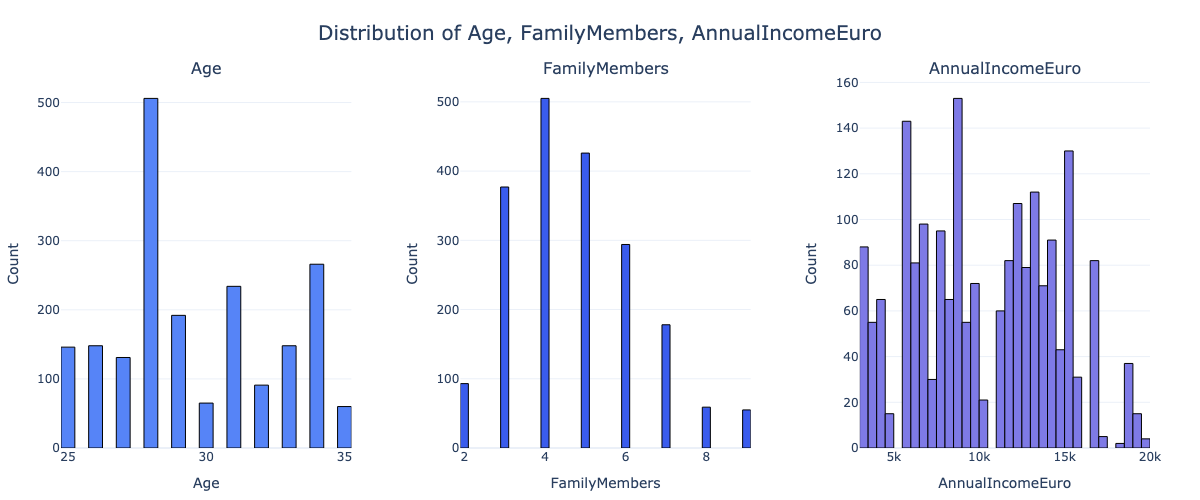

In [103]:
Image(filename="images/combined_histograms.png")

### Age
- **Distribution**: The age distribution shows a significant concentration around 30 years.
- **Range**: Ages in the dataset range from 25 to 35 years.
- **Observations**: There is a noticeable peak at age 30, indicating a higher number of individuals in this age group.

### Family Members
- **Distribution**: The distribution of family members shows a central peak.
- **Range**: Family sizes range from 2 to 9 members.
- **Observations**: Most individuals have 4 to 6 family members, with 4 being the most common family size.

### Annual Income (Euro)
- **Distribution**: The annual income distribution is quite spread out with multiple peaks.
- **Range**: Annual incomes range from approximately 4,400 to 20,000 Euros.
- **Observations**: The data shows several peaks, particularly around 5,000, 10,000, and 15,000 Euros, indicating diverse income levels among the individuals.

Now we can move to bar charts for our categorical features.

In [104]:
plot_combined_bar_charts(travel_df, categorical_features_one, save_path='images/combined_bar_charts1.png')

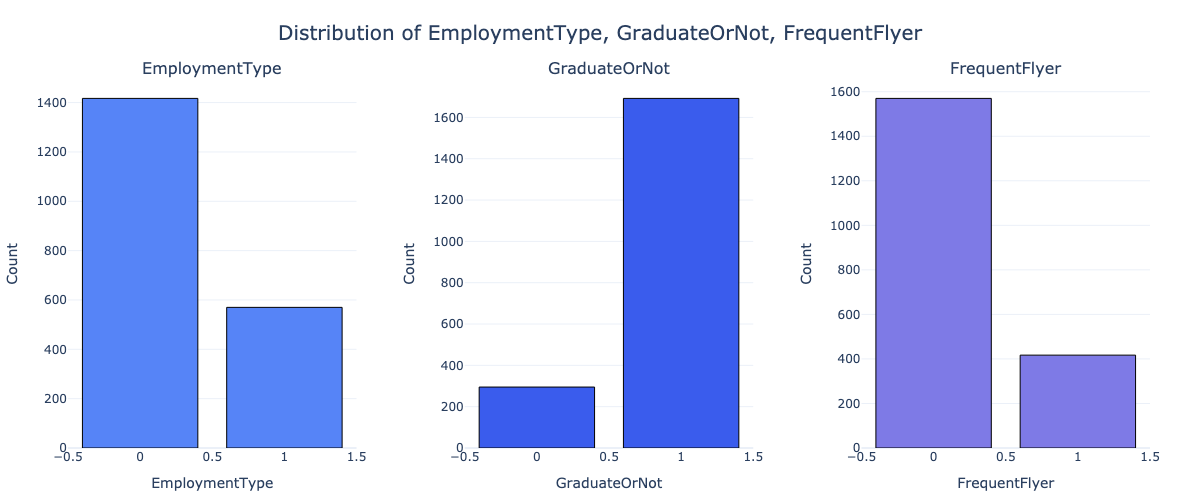

In [105]:
Image(filename="images/combined_bar_charts1_part1.png")

**Employment Type**: The higher proportion of individuals in the **Private Sector/Self Employed** category might influence their travel behavior and insurance uptake differently compared to those in the Government Sector. This could be due to factors such as job stability and disposable income.

**Education Level**: The overwhelming majority of graduates in the dataset could suggest that educational attainment might be a significant factor in travel insurance decisions. Graduates might have different travel patterns and risk perceptions compared to non-graduates.

**Travel Frequency**: The fact that most individuals are not frequent flyers might impact the likelihood of purchasing travel insurance. Frequent flyers could have a higher propensity to buy travel insurance due to increased travel exposure and associated risks

In [106]:
plot_combined_bar_charts(travel_df, categorical_features_two, save_path='images/combined_bar_charts2.png')

In [107]:
%%capture
Image(filename="images/combined_bar_charts2_part1.png")

**International Travel Experience**: The significantly higher number of individuals who have not traveled abroad might affect their perception of the need for travel insurance. Those with international travel experience may have different risk assessments and insurance requirements.

**Travel Insurance Adoption**: The lower proportion of individuals with travel insurance highlights an opportunity for increasing travel insurance coverage. Understanding the factors that influence the decision to purchase travel insurance will be crucial for targeted marketing and product development.

**Health Conditions**: The distribution of chronic diseases can provide insights into health-related considerations that might influence travel insurance decisions. Individuals with chronic diseases might have different requirements and motivations for purchasing insurance.

Now lets move on to the outliers, lets see if our numerical features has any outliers.

In [108]:
plot_combined_boxplots(travel_df, numerical_features, save_path='images/combined_boxplot.png')

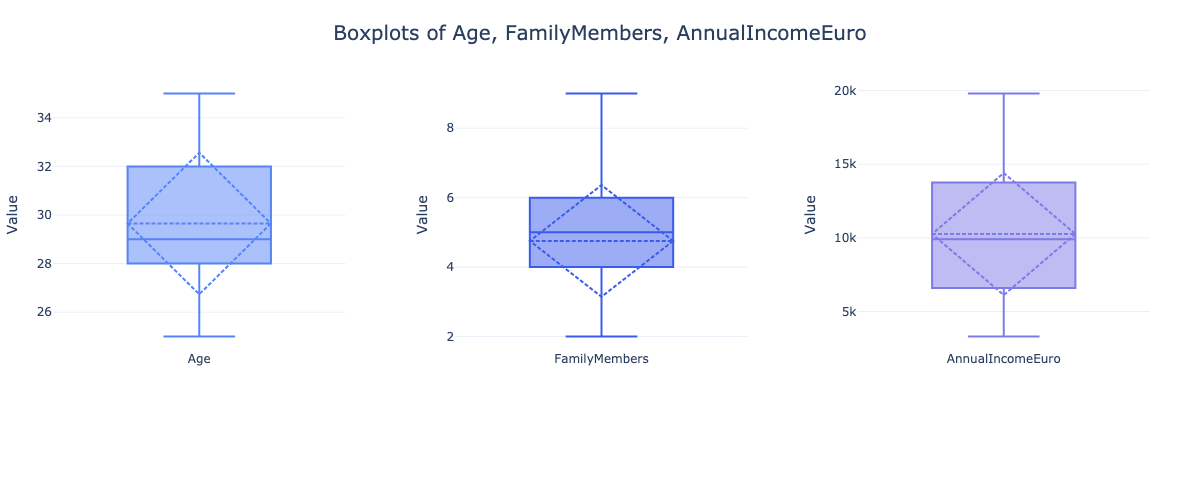

In [109]:
Image(filename="images/combined_boxplot.png")

1. **Age**:
   - **Range**: The ages of individuals range from 26 to 34 years.
   - **Median**: The median age is 30 years.
   - **Distribution**: Age is fairly evenly spread around the median, with no significant outliers.

2. **Family Members**:
   - **Range**: The number of family members ranges from 2 to 9.
   - **Median**: The median number of family members is 5.
   - **Distribution**: The distribution is slightly skewed to the right, indicating a few families with more members but generally centered around 4 to 6 members. No significant outliers are present.

3. **Annual Income (in Euros)**:
   - **Range**: Annual income ranges from 4,000 to 20,000 Euros.
   - **Median**: The median annual income is 10,000 Euros.
   - **Distribution**: The income distribution is fairly symmetrical, centered around the median, with no significant outliers.

In [110]:
plot_correlation_matrix(travel_df, numerical_features, save_path='images/correlation_matrix.png')

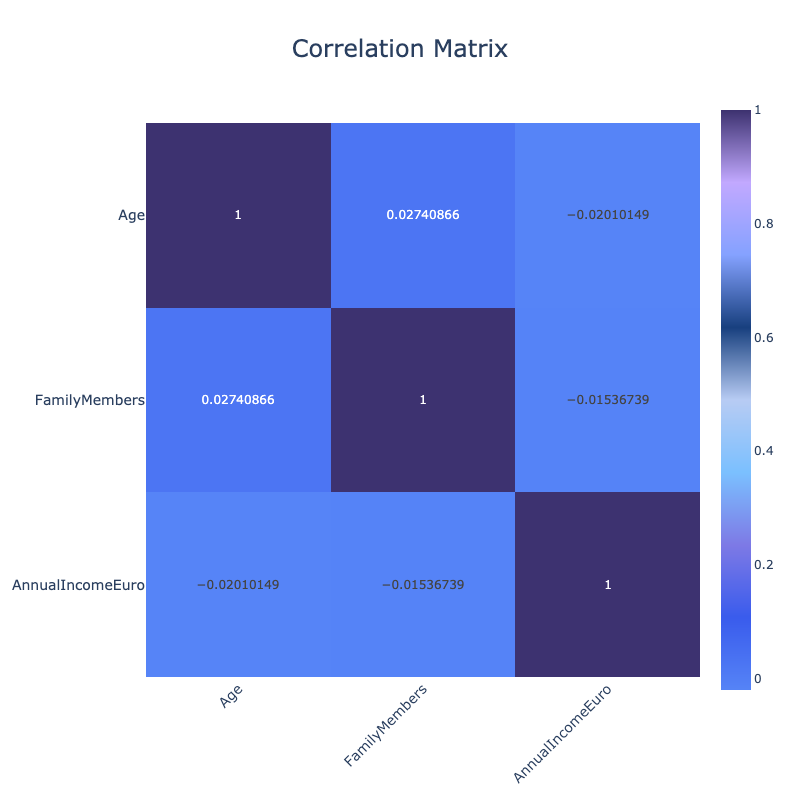

In [111]:
Image(filename="images/correlation_matrix.png")

**Age**:

- **Correlation with FamilyMembers: 0.027** - This indicates a very weak positive correlation between age and the number of family members.

- **Correlation with AnnualIncomeEuro: -0.020** - This indicates a very weak negative correlation between age and annual income in Euros.

**FamilyMembers:**

- **Correlation with Age: 0.027** - As mentioned above, there is a very weak positive correlation.

- **Correlation with AnnualIncomeEuro: -0.015** - This indicates a very weak negative correlation between the number of family members and annual income in Euros.

**AnnualIncomeEuro**:

- **Correlation with Age: -0.020** - As mentioned above, there is a very weak negative correlation.

- **Correlation with FamilyMembers: -0.015** - As mentioned above, there is a very weak negative correlation.

In [112]:
%run -i functions.py